In [ ]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/aridata/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.iloc[:, 0:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = df.iloc[:, -1].values
y[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
[y_train[0:10], y_test[0:10]]

[array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0]), array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])]

In [ ]:
# Масштабирование
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Оценка
print('---------------- Оценка ---------------------')

print('Confusion_matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification_report:')
print(classification_report(y_test, y_pred))

print('\nAccuracy_score:')
print(accuracy_score(y_test, y_pred))

---------------- Оценка ---------------------
Confusion_matrix:
[[140  17]
 [ 34  40]]

Classification_report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231


Accuracy_score:
0.7792207792207793


([<matplotlib.axis.YTick at 0x7fb5474c11c0>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

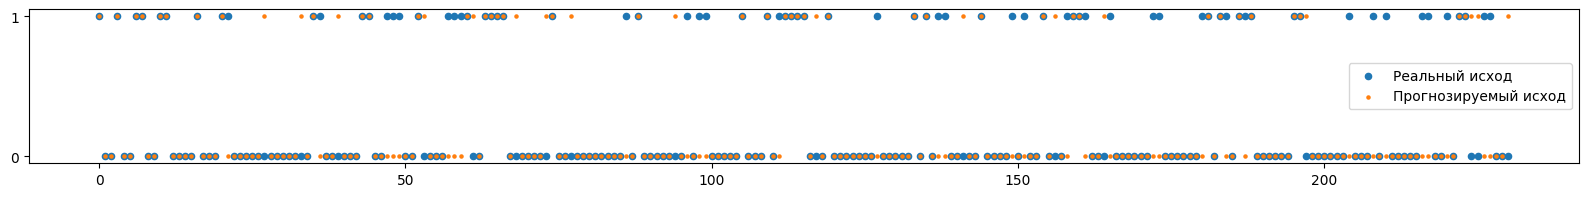

In [ ]:
pyplot.figure(figsize=(20,2))
pyplot.scatter(range(len(y_test)), y_test, s=20)
pyplot.scatter(range(len(y_test)), y_pred, s=5)
pyplot.legend(['Реальный исход', 'Прогнозируемый исход'])
pyplot.yticks([0, 1])

# Вывод
Были получены практические навыки по работе с данными и использования случайного леса для обучения модели. Обученная модель предсказывает результаты с точностью ~78%. На графике представлено наличие диабета для каждого пациента из тестовой выборки и предсказание обученной модели для пациентов этой выборки по их показателям: визуально наблюдается совпадение точек в больше, чем половине случаев.